In [1]:
# import libraries
import mne
from mne.datasets import ssvep
from asr import ASR
from asr_pytorch import Pytorch_ASR

In [2]:
# Load raw data
data_path = str(ssvep.data_path())
raw_fname = data_path + '/sub-02/ses-01/eeg/sub-02_ses-01_task-ssvep_eeg.vhdr'
raw = mne.io.read_raw_brainvision(raw_fname, preload=True, verbose=False)

# Set montage
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, verbose=False)

# downsample for faster computation
raw.resample(256)

# apply a highpass filter from 1 Hz upwards
raw.filter(1., None, fir_design='firwin')  # replace baselining with high-pass

# Construct epochs
event_id = {'12hz': 255, '15hz': 155}
events, _ = mne.events_from_annotations(raw, verbose=False)

# epoching time frame
tmin, tmax = -0.1, 1.5

# create an uncleaned average (for comparison purposes)
noisy_avg = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                           picks=None, baseline=None, preload=True,
                           verbose=False).average()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


In [5]:
# Apply the ASR
asr = ASR(sfreq=raw.info["sfreq"], cutoff=15)
asr.fit(raw)
raw = asr.transform(raw)

# Create an average using the cleaned data
clean_avg = mne.Epochs(raw, events, event_id, -0.1, 1.5, proj=False,
                picks=None, baseline=None, preload=True,
                verbose=False).average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


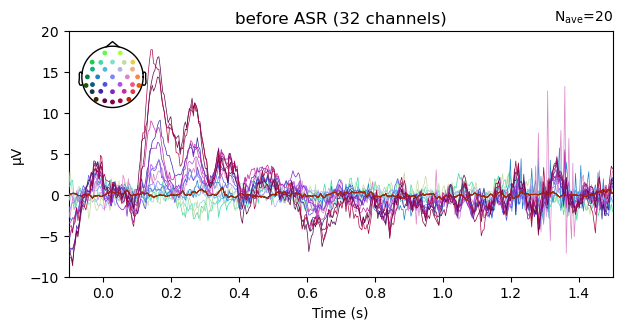

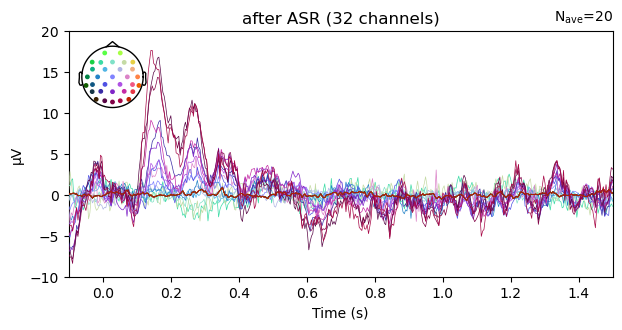

In [4]:
# set y axis limits
ylim = dict(eeg=[-10, 20])

# Plot image epoch before xdawn
noisy_avg.plot(spatial_colors=True, ylim=ylim,
               titles="before ASR")

# Plot image epoch before xdawn
clean_avg.plot(spatial_colors=True, ylim=ylim,
               titles="after ASR");

In [3]:
# Apply the Pytorch ASR
asr = Pytorch_ASR(sfreq=raw.info["sfreq"], cutoff=15)
asr.fit(raw)
raw = asr.transform(raw)

# Create an average using the cleaned data
clean_avg = mne.Epochs(raw, events, event_id, -0.1, 1.5, proj=False,
                picks=None, baseline=None, preload=True,
                verbose=False).average()

TypeError: sum(): argument 'input' (position 1) must be Tensor, not numpy.ndarray